In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import shutil


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import PIL
import PIL.Image
from matplotlib.image import imread

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

from keras import utils

In [3]:
tf.__version__

'2.11.0'

In [8]:
print('total Healthy images:', len(os.listdir("/kaggle/input/yellowrust19-yellow-rust-disease-in-wheat/RAW/RAW/0/")))

total Healthy images: 205


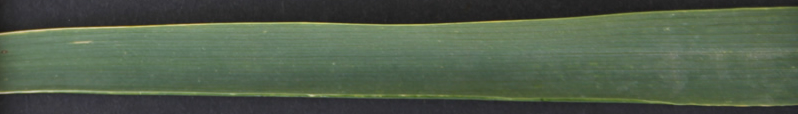

In [9]:
PIL.Image.open("/kaggle/input/yellowrust19-yellow-rust-disease-in-wheat/RAW/RAW/0/108.jpg")